In [1]:
#Import all the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Using pandas read the data into the notebook

df = pd.read_csv('/Users/mehakagrawal/Desktop/Cardio_Data.csv')

print(df.head())

         age gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  50.391781      m     168      62    110     80            1     1      0   
1  55.419178      f     156      85    140     90            3     1      0   
2  51.663014      f     165      64    130     70            3     1      0   
3  48.282192      m     169      82    150    100            1     1      0   
4  47.873973      f     156      56    100     60            1     1      0   

   alco  active  target  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [3]:
df.shape

(70000, 12)

In [4]:
df.describe

<bound method NDFrame.describe of              age gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      50.391781      m     168      62    110     80            1     1   
1      55.419178      f     156      85    140     90            3     1   
2      51.663014      f     165      64    130     70            3     1   
3      48.282192      m     169      82    150    100            1     1   
4      47.873973      f     156      56    100     60            1     1   
...          ...    ...     ...     ...    ...    ...          ...   ...   
69995  52.712329      m     168      76    120     80            1     1   
69996  61.920548      f     158     126    140     90            2     2   
69997  52.235616      m     183     105    180     90            3     1   
69998  61.454795      f     163      72    135     80            1     2   
69999  56.273973      f     170      72    120     80            2     1   

       smoke  alco  active  target  
0          0    

In [5]:
df.dtypes

age            float64
gender          object
height           int64
weight           int64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
target           int64
dtype: object

In [6]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'target'],
      dtype='object')

In [7]:
#Check for any null/missing values

df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
target         0
dtype: int64

In [8]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
target         0
dtype: int64

In [9]:
#Convert object to binary values (0,1)

df['gender'] = df['gender'].map({'f':0,'m':1})
print('')
print(df['gender'].value_counts())


0    45530
1    24470
Name: gender, dtype: int64


In [14]:
#Convert age column data type to int

import numpy as np
df['age'] = np.ceil(df['age']).astype(int)

In [15]:
df.dtypes

age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
target         int64
dtype: object

In [16]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,50,1,168,62,110,80,1,1,0,0,1,0
1,55,0,156,85,140,90,3,1,0,0,1,1
2,51,0,165,64,130,70,3,1,0,0,0,1
3,48,1,169,82,150,100,1,1,0,0,1,1
4,47,0,156,56,100,60,1,1,0,0,0,0
5,60,0,151,67,120,80,2,2,0,0,0,0
6,60,0,157,93,130,80,3,1,0,0,1,0
7,61,1,178,95,130,90,3,3,0,0,1,1
8,48,0,158,71,110,70,1,1,0,0,1,0
9,54,0,164,68,110,60,1,1,0,0,0,0


In [17]:
#Define the target variable

target = 'target'
print(df['target'].value_counts())

0    35021
1    34979
Name: target, dtype: int64


In [18]:
## Create numerical and categorical columns and print the length

numerical = df.select_dtypes(include=['int64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 0 Categorical variables
There are 12 Numerical variables


In [19]:
#X represents input features and y is the target value

X = df.drop('target', axis=1)
y = df['target']

In [20]:
#Perform standard scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Train a Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Prediction on test set
y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)[:, 1]

In [27]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

ROC-AUC Score: 0.80


In [28]:
# Perform GridSearchCV with cross-validation and obtain the Best Parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


In [29]:
#Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of people with/without Heart Disease')

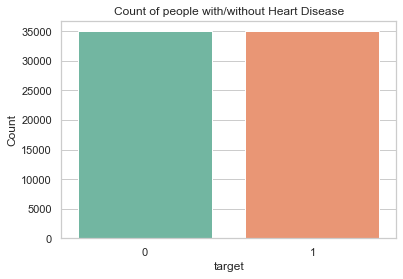

In [30]:
#Barplot
sns.set(style="whitegrid")
ax = sns.countplot(x = target, 
                data=df,
                palette='Set2',
                order = df['target'].value_counts().index
                )
ax.set_ylabel('Count')
plt.title('Count of people with/without Heart Disease')

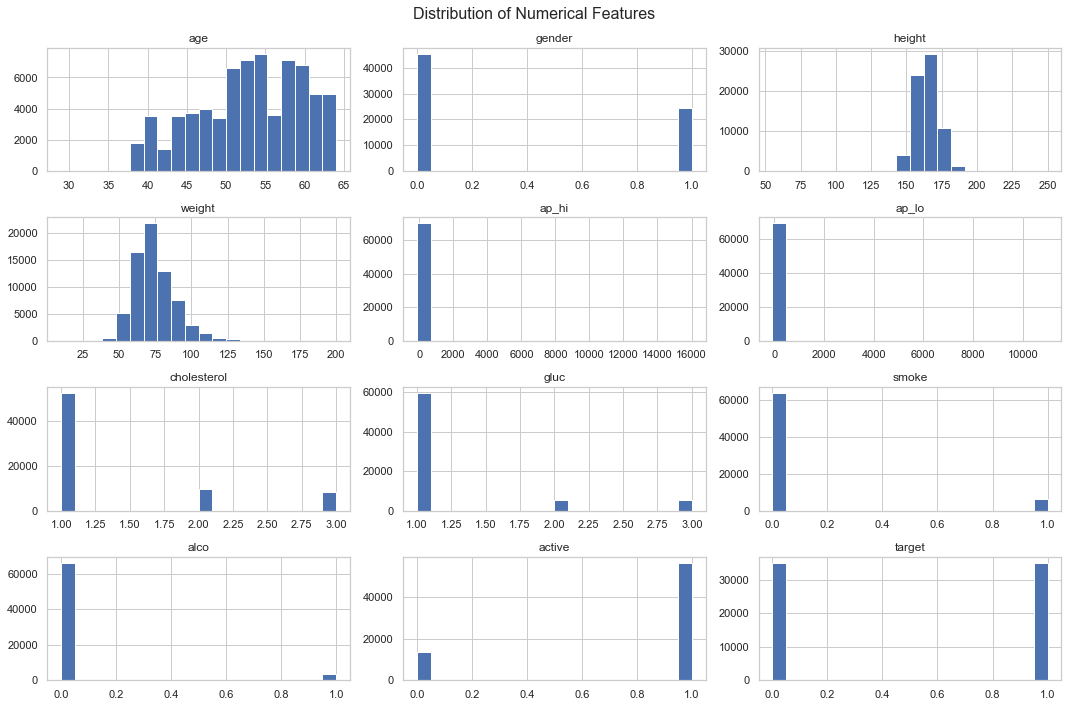

In [31]:
#Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

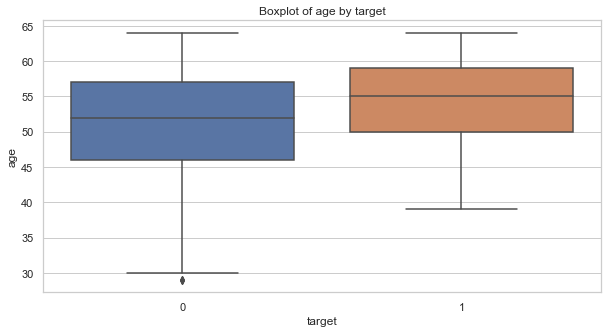

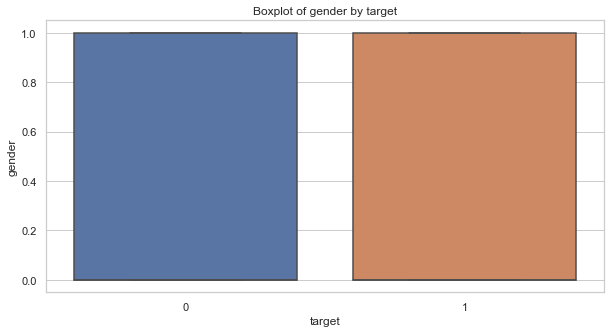

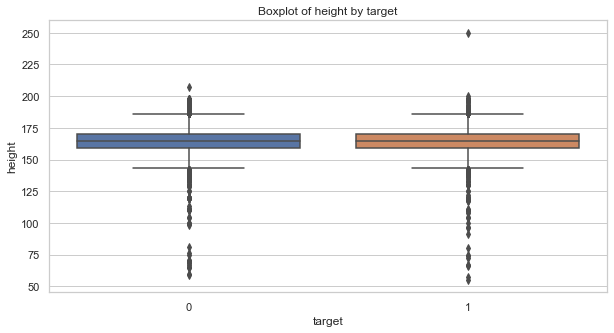

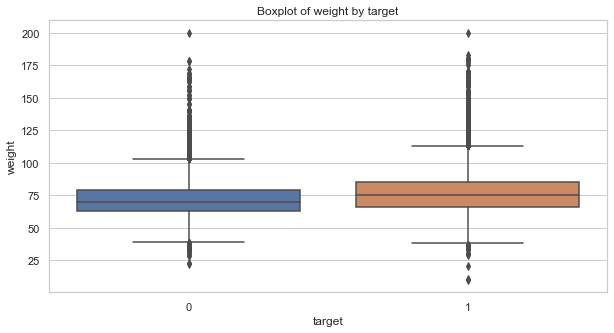

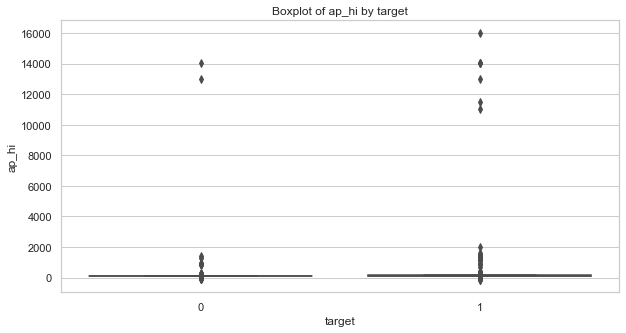

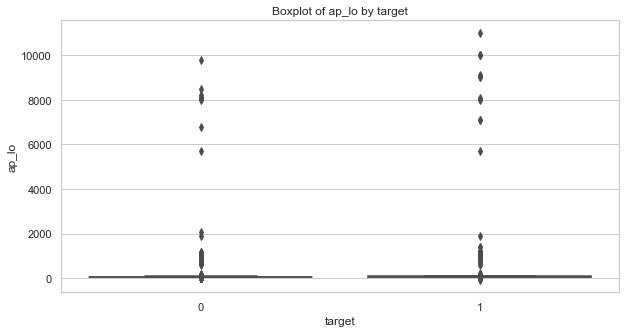

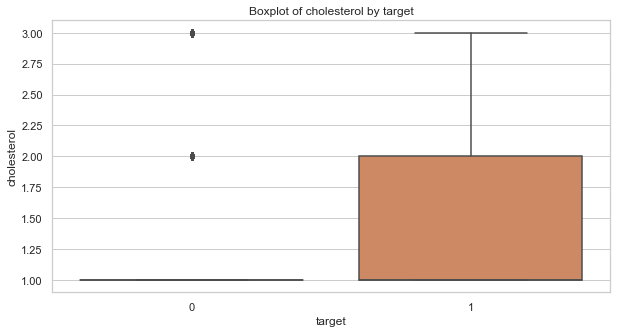

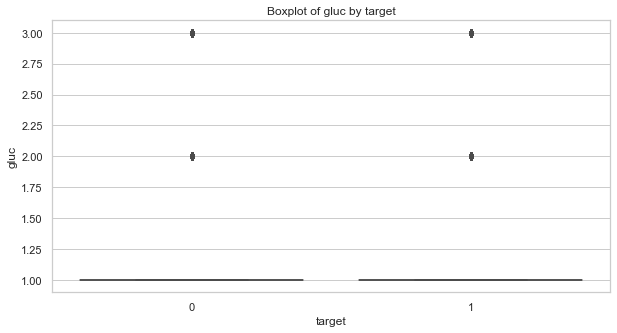

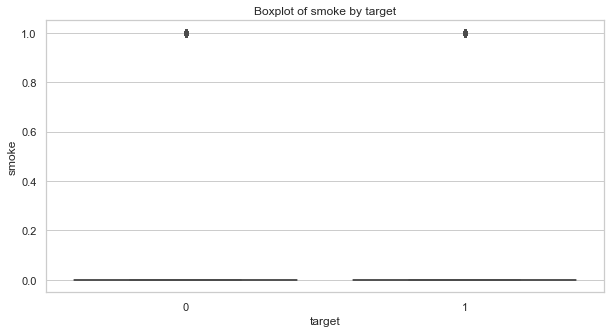

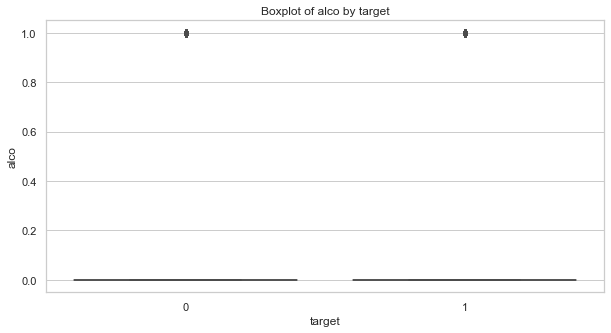

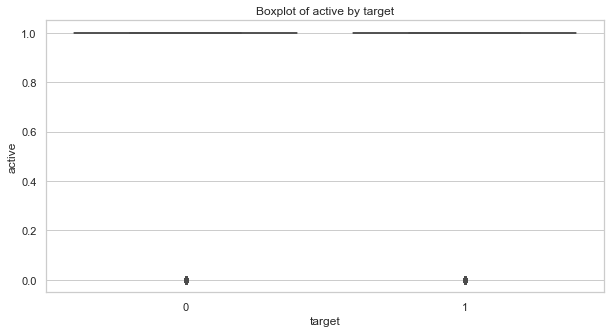

In [32]:
#Boxplot
numerical_columns = df.select_dtypes(include=['int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'Boxplot of {col} by {target}')
        plt.show()

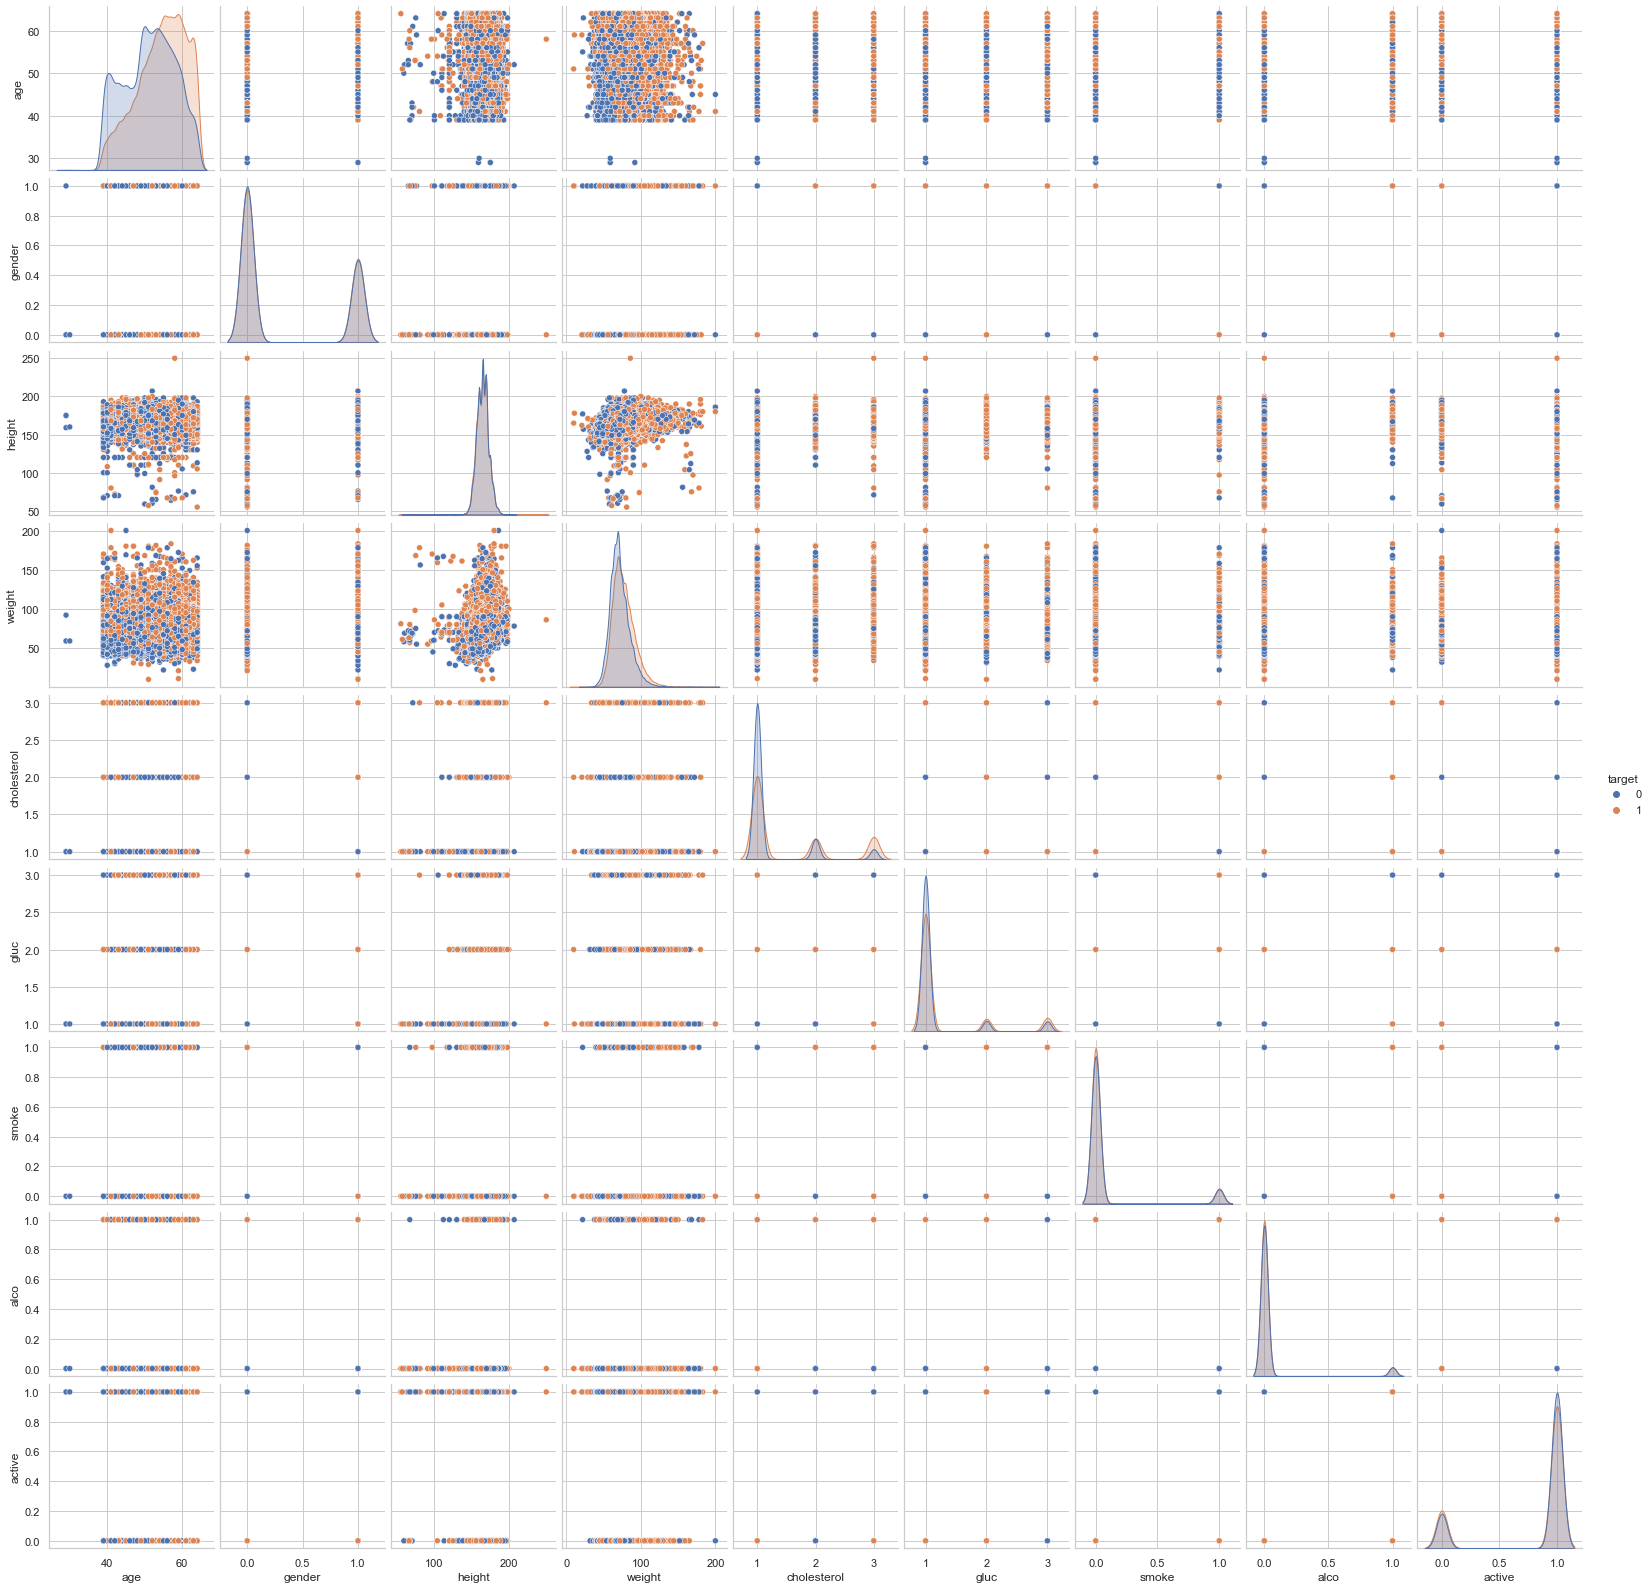

In [39]:
#Pairplot
sns.pairplot(df[['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'target']], hue='target')
plt.show()

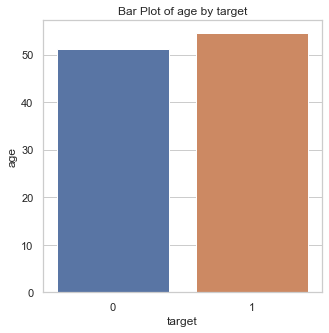

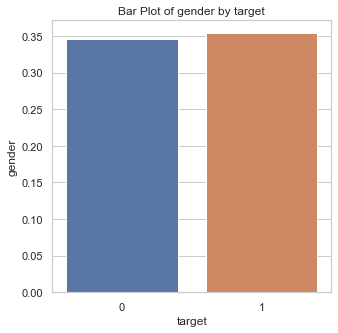

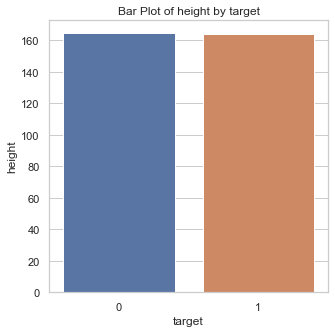

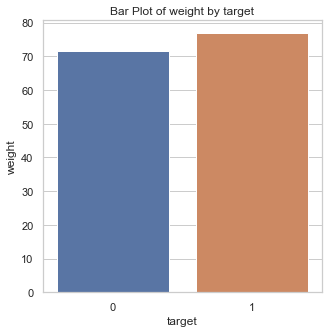

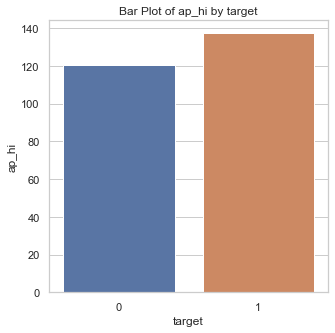

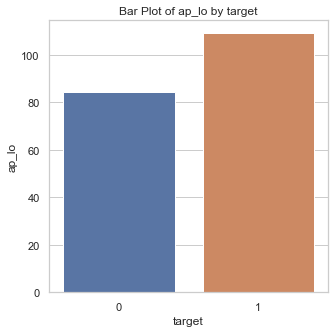

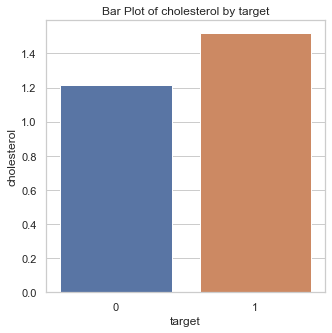

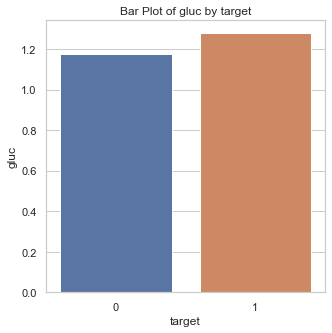

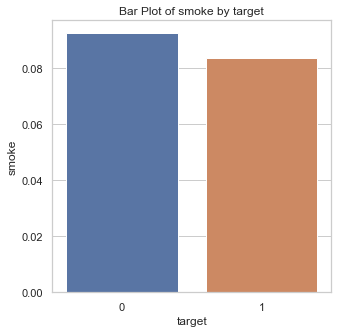

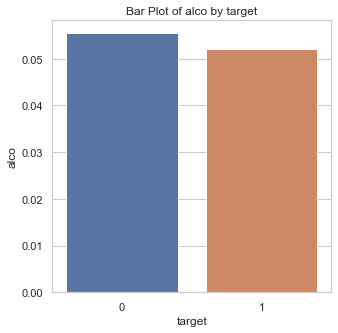

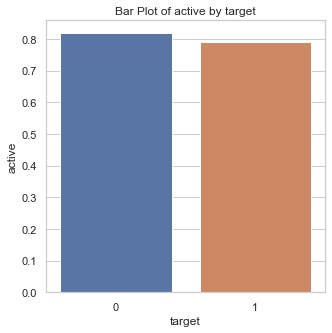

In [37]:
#Barplot
numerical_columns = df.select_dtypes(include=['int64']).columns
target = 'target'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(5, 5))
        sns.barplot(x=target, y=col, data=df, ci=None)
        plt.title(f'Bar Plot of {col} by {target}')
        plt.show()

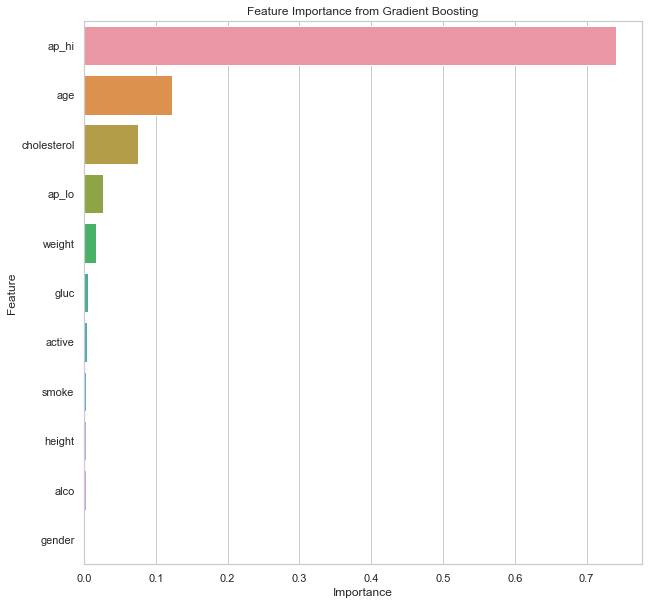

In [40]:
#Plot for Feature Importance
fea_imp = gb_clf.feature_importances_
fea = X.columns

imp_df = pd.DataFrame({'Feature': fea, 'Importance': fea_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

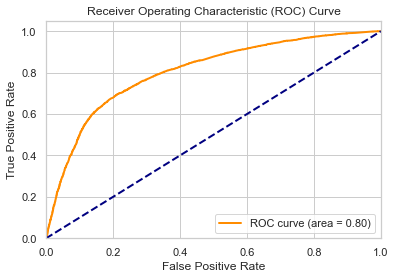

In [41]:
#ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

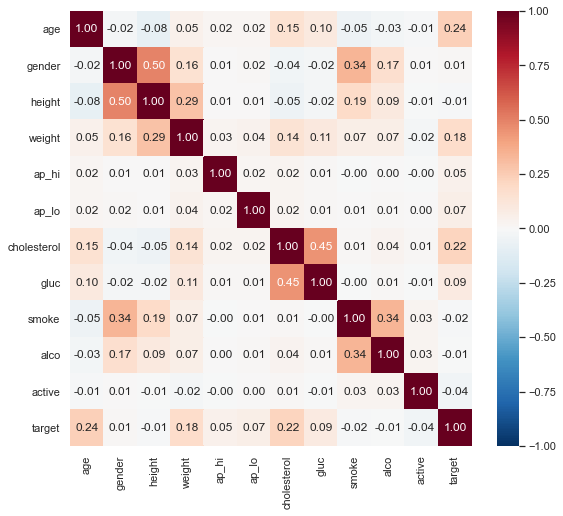

In [42]:
#Heatmap
import numpy as np

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(9,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()